# Tutorial document for RGB Hexagram (Kondo 2025)

This jupyter lab demonstrates the creation of RGB hexagrams based on Kondo (2025) and a tutorial on analysis with RGB hexagrams using sample data. <br>
Please see other jupyter labs for examples of application to 4D and 5D data.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm

# Create RGB Hexagram array data

The size of the RGB hexagram can be specified by changing the coefficient k (see Kondo 2025 for details). <br>
(k<=11 is recommended.)

In [2]:
from generate_rgb_hex import generate_rgb_hex

# input RGB hexagram size parameter
k = 11

# generate RGB hexagram array-> r_hex:Red data, g_hex:Green data, b_data:Blue data, num_hex:Area data
# r,g,b_hex array data between 0 to 1, num_hex data between 1 to 15
r_hex, g_hex, b_hex, num_hex = generate_rgb_hex(k)

grid size : 96
center pos: 24
RGB pos for Green:
R: 24, 85
G: 12, 24
B: 85, 12
CYM pos:
C: 24, 12
Y: 12, 85
M: 85, 24
----
basic RGB-W grid num: 11
one-cycle grid num  : 72
max-cycle grid num  : 138
changing ratio      : 21.25
min changing ratio  : 11.08695652173913
----
sample grid cycle
R->Y->G->C->B->M->...
rgb_hex shape: (96, 96)
----
output_filename-> r_file: rw_hex_test_d.csv , g_file: gw_hex_test_d.csv , b_file: bw_hex_test_d.csv n_file nw_hex_test_d.csv


# Plotting base RGB hexagram results

r_hex: Red, g_hex: Green, and b_hex: Blue normalized RGB value distribution are plotted. <br>
num_hex is the Areas of RGB hexagram

/home/makoto56/.local/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


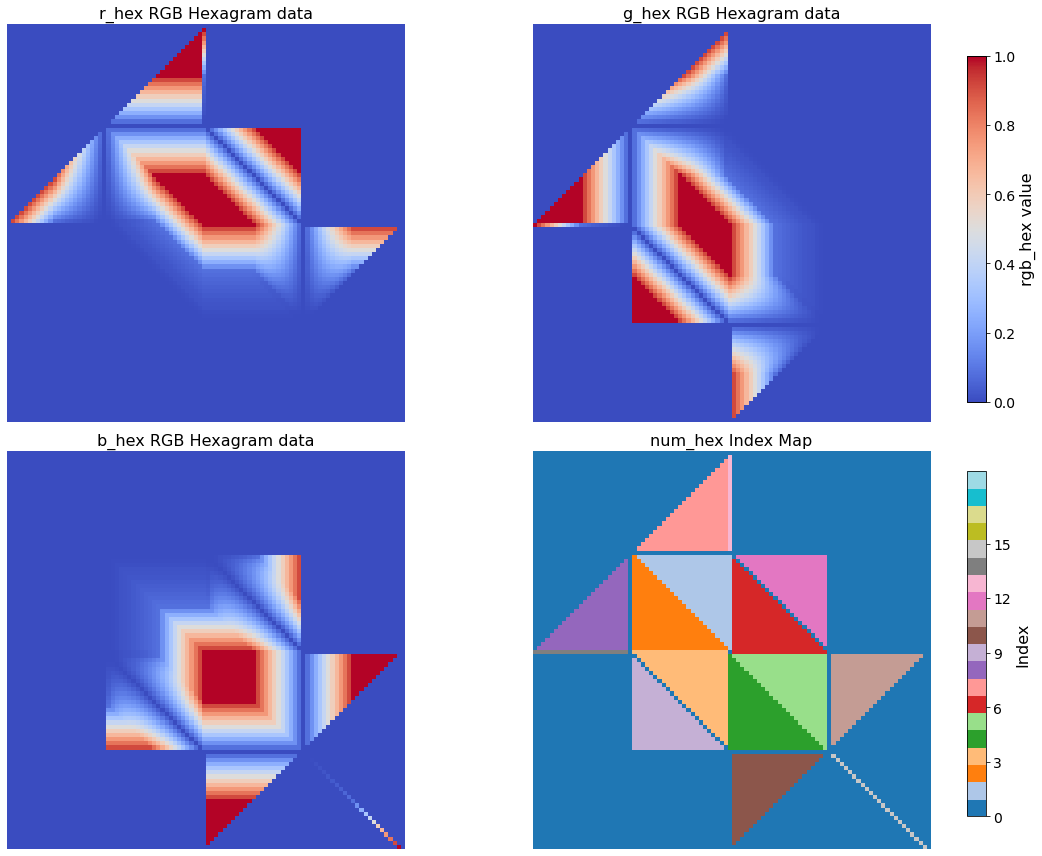

In [3]:
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05], height_ratios=[1, 1])  # 2行3列

# position of each plot
ax0 = fig.add_subplot(gs[0, 0])  # r_hex
ax1 = fig.add_subplot(gs[0, 1])  # g_hex
cax1 = fig.add_axes([0.82, 0.53, 0.015, 0.4]) # [left, bottom, width, height]

ax2 = fig.add_subplot(gs[1, 0])  # b_hex
ax3 = fig.add_subplot(gs[1, 1])  # num_hex
cax3 = fig.add_axes([0.82, 0.05, 0.015, 0.4])

# r_hex
im0 = ax0.imshow(r_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax0.set_title('r_hex RGB Hexagram data', fontsize=16)
ax0.axis('off')

# g_hex
im1 = ax1.imshow(g_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax1.set_title('g_hex RGB Hexagram data', fontsize=16)
ax1.axis('off')
fig.colorbar(im1, cax=cax1, label='g_hex value')
cb1 = fig.colorbar(im1, cax=cax1)
cb1.set_label('rgb_hex value', fontsize=16)
cb1.ax.tick_params(labelsize=14)

# b_hex
im2 = ax2.imshow(b_hex[:, :], vmin=0, vmax=1, cmap='coolwarm', origin='lower')
ax2.set_title('b_hex RGB Hexagram data', fontsize=16)
ax2.axis('off')

# num_hex
im3 = ax3.imshow(num_hex[:, :] * 256.0, vmin=0, vmax=19, cmap='tab20', origin='lower')
ax3.set_title('num_hex Index Map', fontsize=16)
ax3.axis('off')
cb3 = fig.colorbar(im3, cax=cax3)
cb3.set_label('Index', fontsize=16)
cb3.set_ticks(np.arange(0, 16, 3))
cb3.ax.tick_params(labelsize=14)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


In [4]:
print(r_hex.shape)
print(g_hex.shape)
print(b_hex.shape)

(96, 96)
(96, 96)
(96, 96)


# Plotting RGB hexagrams by RGB values

Generated RGB values are used for plotting color plots.

(96, 96)


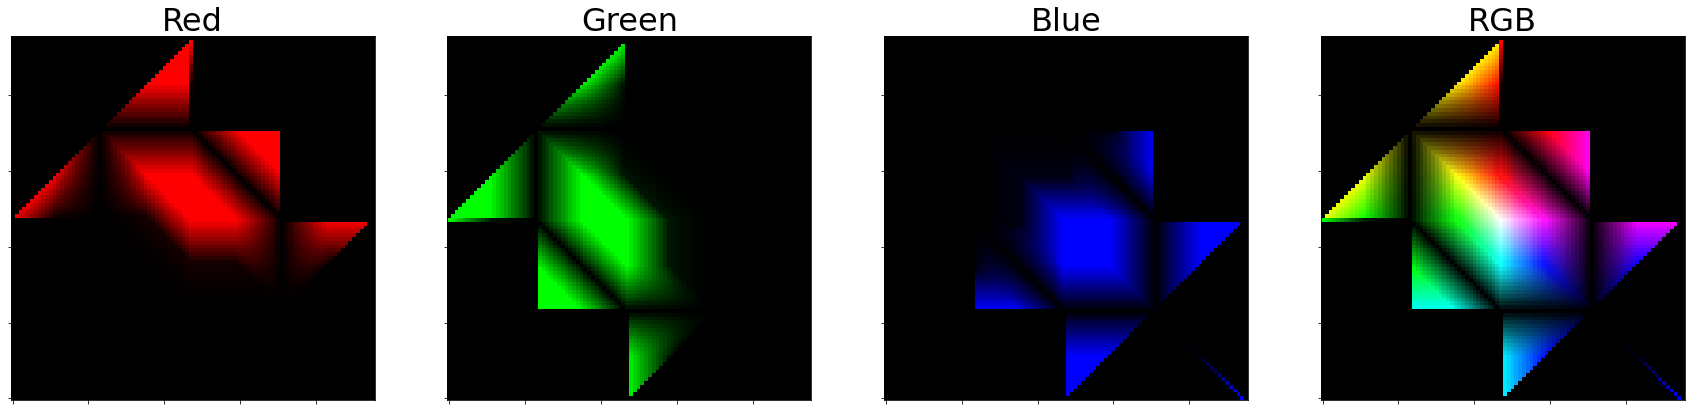

In [5]:
# Read CSV files
r_df = pd.read_csv('rw_hex_test_d.csv', header=None)
g_df = pd.read_csv('gw_hex_test_d.csv', header=None)
b_df = pd.read_csv('bw_hex_test_d.csv', header=None)
n_df = pd.read_csv('nw_hex_test_d.csv', header=None)

# Replace negative values with zero
n_df[n_df < 0] = 0
n_df[n_df > 100] = 0

r_df = r_df.iloc[:, :]
g_df = g_df.iloc[:, :]
b_df = b_df.iloc[:, :]
n_df = n_df.iloc[:, :]

# Normalize RGB values to the range 0~1
r = np.clip(r_df.values, 0, 1)
g = np.clip(g_df.values, 0, 1)
b = np.clip(b_df.values, 0, 1)

# Combine RGB values into a single array
rgb = np.dstack((r, g, b))

# Convert to 1 column
r_series = r_df.stack().reset_index(drop=True)
g_series = g_df.stack().reset_index(drop=True)
b_series = b_df.stack().reset_index(drop=True)

print(r_df.shape)

# Plotting
fig, axs = plt.subplots(1, 4, figsize=(30, 15))
fsiz=32

# Colormap Definition
n_bins = 256  # Colormap fineness
r_colors = [(0, 0, 0), (1, 0, 0)]  # RGB values in the range 0-1
r_cmap_name = 'black_to_red'

g_colors = [(0, 0, 0), (0, 1, 0)]
g_cmap_name = 'black_to_green'

b_colors = [(0, 0, 0), (0, 0, 1)]
b_cmap_name = 'black_to_blue'

# Create color maps
cmr = LinearSegmentedColormap.from_list(r_cmap_name, r_colors, N=n_bins)
cmg = LinearSegmentedColormap.from_list(g_cmap_name, g_colors, N=n_bins)
cmb = LinearSegmentedColormap.from_list(b_cmap_name, b_colors, N=n_bins)

# plotting each data
im1 = axs[0].imshow(r, cmap=cmr, origin='lower')
axs[0].set_title('Red', fontsize=fsiz)
axs[0].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im2 = axs[1].imshow(g, cmap=cmg, origin='lower')
axs[1].set_title('Green', fontsize=fsiz)
axs[1].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im3 = axs[2].imshow(b, cmap=cmb, origin='lower')
axs[2].set_title('Blue', fontsize=fsiz)
axs[2].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

im4 = axs[3].imshow(rgb, interpolation='nearest', origin='lower')
axs[3].set_title('RGB', fontsize=fsiz)
axs[3].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.show()

# Plotting an RGB hexagram using the sample 3D data

This tutorial shows the distribution of sample 3D data on an RGB hexagram generated. <br>
For tutorials using 4D and 5D data, please see other jupyter labs.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset


# NetCDFファイルを開く（読み取り専用）
ncfile = Dataset('merged-z_sn14_history_d01.pe000000.nc', mode='r')

print(ncfile.variables.keys())
print(ncfile.variables['DENS'])  # z変数の情報

# 'DENS' 変数をすべての次元にわたって読み込む
dens_s = ncfile.variables['DENS'][:,:,:,:] 
qhyd_s = ncfile.variables['QHYD'][:,:,:,:]
qr_s = ncfile.variables['QR'][:,:,:,:]
qc_s = ncfile.variables['QC'][:,:,:,:]
qg_s = ncfile.variables['QG'][:,:,:,:]
qs_s = ncfile.variables['QS'][:,:,:,:]
qi_s = ncfile.variables['QI'][:,:,:,:]
t_s  = ncfile.variables['T'][:,:,:,:]
ts_s = ncfile.variables['SFC_TEMP'][:,:,:]

lat = ncfile.variables['lat'][:,:]   # shape: (y, x)
lon = ncfile.variables['lon'][:,:]   # shape: (y, x)
#Z = np.tile(z[:, np.newaxis], (1, len(lat[:,])))  # 高さZを2Dに拡張（z, y）
zz = ncfile.variables['z'][:]   # shape: (y, x)

# Fill値の取得（DENSとQRが同じなら1つだけでOK）
fill_value = ncfile.variables['DENS']._FillValue

# 変数を指定して読み込む（必要なものだけ）
z = ncfile.variables['z'][:]     # 高さ方向などのメイン変数
x = ncfile.variables['x'][:]     # x方向座標
y = ncfile.variables['y'][:]     # y方向座標
time_val = ncfile.variables['time'][:]  # 時間軸

# ファイルを閉じる
ncfile.close()


odict_keys(['z', 'z_bnds', 'zh', 'zh_bnds', 'oz', 'oz_bnds', 'ozh', 'ozh_bnds', 'lz', 'lz_bnds', 'lzh', 'lzh_bnds', 'uz', 'uz_bnds', 'uzh', 'uzh_bnds', 'x', 'x_bnds', 'xh', 'xh_bnds', 'y', 'y_bnds', 'yh', 'yh_bnds', 'CZ', 'FZ', 'CDZ', 'FDZ', 'CBFZ', 'FBFZ', 'OCZ', 'OFZ', 'OCDZ', 'LCZ', 'LFZ', 'LCDZ', 'UCZ', 'UFZ', 'UCDZ', 'CX', 'CY', 'FX', 'FY', 'CDX', 'CDY', 'FDX', 'FDY', 'CBFX', 'CBFY', 'FBFX', 'FBFY', 'CXG', 'CYG', 'FXG', 'FYG', 'CDXG', 'CDYG', 'FDXG', 'FDYG', 'CBFXG', 'CBFYG', 'FBFXG', 'FBFYG', 'height', 'height_xyw', 'height_uyz', 'height_xvz', 'height_uvz', 'height_uyw', 'height_xvw', 'height_uvw', 'lon', 'lon_uy', 'lon_xv', 'lon_uv', 'lat', 'lat_uy', 'lat_xv', 'lat_uv', 'cell_area', 'cell_area_uy', 'cell_area_xv', 'cell_area_uyz_x', 'cell_area_xvz_y', 'cell_area_uyw_x', 'cell_area_xvw_y', 'cell_area_xyz_x', 'cell_area_uvz_y', 'cell_area_uvz_x', 'cell_area_xyz_y', 'cell_volume', 'cell_volume_xyw', 'cell_volume_uyz', 'cell_volume_xvz', 'cell_volume_xyo', 'cell_volume_xyl', 'cell_v

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset


# NetCDFファイルを開く（読み取り専用）
ncfile = Dataset('merged-z_t08_history_d01.pe000000.nc', mode='r')

print(ncfile.variables.keys())
print(ncfile.variables['DENS'])  # z変数の情報

# 'DENS' 変数をすべての次元にわたって読み込む
dens_t = ncfile.variables['DENS'][:,:,:,:] 
qhyd_t = ncfile.variables['QHYD'][:,:,:,:]
qr_t = ncfile.variables['QR'][:,:,:,:]
qc_t = ncfile.variables['QC'][:,:,:,:]
qg_t = ncfile.variables['QG'][:,:,:,:]
qs_t = ncfile.variables['QS'][:,:,:,:]
qi_t = ncfile.variables['QI'][:,:,:,:]
t_t  = ncfile.variables['T'][:,:,:,:]
ts_t = ncfile.variables['SFC_TEMP'][:,:,:]

lat = ncfile.variables['lat'][:,:]   # shape: (y, x)
lon = ncfile.variables['lon'][:,:]   # shape: (y, x)
#Z = np.tile(z[:, np.newaxis], (1, len(lat[:,])))  # 高さZを2Dに拡張（z, y）
zz = ncfile.variables['z'][:]   # shape: (y, x)

# Fill値の取得（DENSとQRが同じなら1つだけでOK）
fill_value = ncfile.variables['DENS']._FillValue

# 変数を指定して読み込む（必要なものだけ）
z = ncfile.variables['z'][:]     # 高さ方向などのメイン変数
x = ncfile.variables['x'][:]     # x方向座標
y = ncfile.variables['y'][:]     # y方向座標
time_val = ncfile.variables['time'][:]  # 時間軸

# ファイルを閉じる
ncfile.close()


odict_keys(['z', 'z_bnds', 'zh', 'zh_bnds', 'oz', 'oz_bnds', 'ozh', 'ozh_bnds', 'lz', 'lz_bnds', 'lzh', 'lzh_bnds', 'uz', 'uz_bnds', 'uzh', 'uzh_bnds', 'x', 'x_bnds', 'xh', 'xh_bnds', 'y', 'y_bnds', 'yh', 'yh_bnds', 'CZ', 'FZ', 'CDZ', 'FDZ', 'CBFZ', 'FBFZ', 'OCZ', 'OFZ', 'OCDZ', 'LCZ', 'LFZ', 'LCDZ', 'UCZ', 'UFZ', 'UCDZ', 'CX', 'CY', 'FX', 'FY', 'CDX', 'CDY', 'FDX', 'FDY', 'CBFX', 'CBFY', 'FBFX', 'FBFY', 'CXG', 'CYG', 'FXG', 'FYG', 'CDXG', 'CDYG', 'FDXG', 'FDYG', 'CBFXG', 'CBFYG', 'FBFXG', 'FBFYG', 'height', 'height_xyw', 'height_uyz', 'height_xvz', 'height_uvz', 'height_uyw', 'height_xvw', 'height_uvw', 'lon', 'lon_uy', 'lon_xv', 'lon_uv', 'lat', 'lat_uy', 'lat_xv', 'lat_uv', 'cell_area', 'cell_area_uy', 'cell_area_xv', 'cell_area_uyz_x', 'cell_area_xvz_y', 'cell_area_uyw_x', 'cell_area_xvw_y', 'cell_area_xyz_x', 'cell_area_uvz_y', 'cell_area_uvz_x', 'cell_area_xyz_y', 'cell_volume', 'cell_volume_xyw', 'cell_volume_uyz', 'cell_volume_xvz', 'cell_volume_xyo', 'cell_volume_xyl', 'cell_v

In [8]:
print(z.shape)

(36,)


/home/makoto56/.local/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1703: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


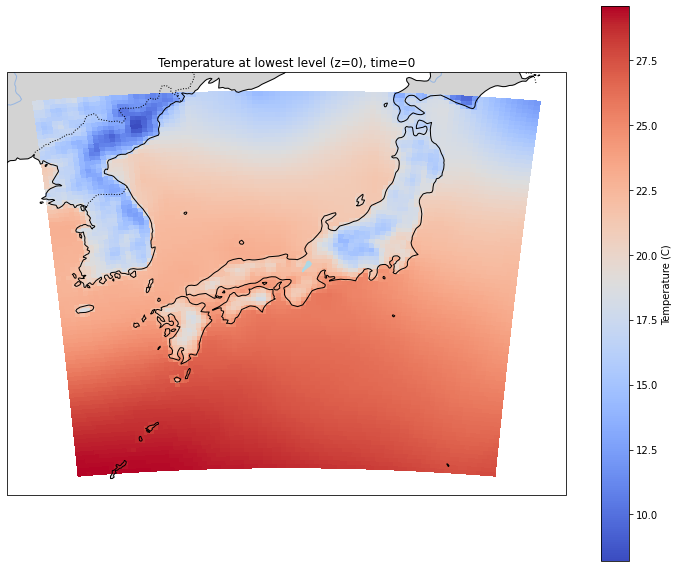

In [9]:
plt.figure(figsize=(10, 8))

# 地図投影法（TのデータはLCCかつ緯度経度付き）
ax = plt.axes(projection=ccrs.PlateCarree())
cf = ax.pcolormesh(lon, lat, ts_t[0,:,:]-273.15, cmap='coolwarm', shading='auto')

# 地図要素の追加
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)

# カラーバーとタイトル
plt.colorbar(cf, label='Temperature (C)')
plt.title('Temperature at lowest level (z=0), time=0')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


CL の最大値: 1.4811851978302002
CL の最小値: 0.0
----
CG の最大値: 0.8938866853713989
CG の最小値: 0.0
----
CI の最大値: 0.1954497992992401
CI の最小値: 0.0


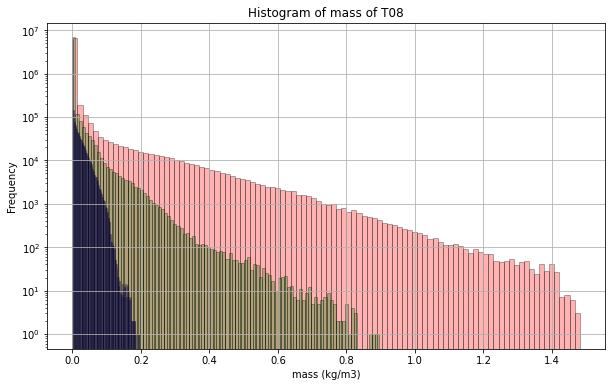

In [10]:
# 欠損値を含む要素をマスク
valid_mask = (dens_t != fill_value) & (qr_t != fill_value) & (qc_t != fill_value) & (qg_t != fill_value) & (qs_t != fill_value) & (qi_t != fill_value)

# 欠損値を除去して1次元化
dens_t_clean = dens_t[valid_mask].flatten()
qr_t_clean = qr_t[valid_mask].flatten()
qc_t_clean = qc_t[valid_mask].flatten()
qg_t_clean = qg_t[valid_mask].flatten()
qs_t_clean = qs_t[valid_mask].flatten()
qi_t_clean = qi_t[valid_mask].flatten()

# DENS * QR の計算
CR_t = dens_t_clean * qr_t_clean * 1000.0
CC_t = dens_t_clean * qc_t_clean * 1000.0
CG_t = dens_t_clean * qg_t_clean * 1000.0
CS_t = dens_t_clean * qs_t_clean * 1000.0
CI_t = dens_t_clean * qi_t_clean * 1000.0
CL_t = dens_t_clean * (qr_t_clean + qc_t_clean) * 1000.0
CI_t = dens_t_clean * (qi_t_clean + qs_t_clean) * 1000.0

# 最大値・最小値の表示
print(f"CL の最大値: {np.max(CL_t)}")
print(f"CL の最小値: {np.min(CL_t)}")
print('----')
print(f"CG の最大値: {np.max(CG_t)}")
print(f"CG の最小値: {np.min(CG_t)}")
print('----')
print(f"CI の最大値: {np.max(CI_t)}")
print(f"CI の最小値: {np.min(CI_t)}")

# ヒストグラムの描画
plt.figure(figsize=(10, 6))
plt.hist(CL_t, bins=100, color='red', edgecolor='black', alpha =0.3)
plt.hist(CG_t, bins=100, color='green', edgecolor='black', alpha =0.3)
plt.hist(CI_t, bins=100, color='blue', edgecolor='black', alpha =0.3)
plt.yscale('log')
plt.title('Histogram of mass of T08')
plt.xlabel('mass (kg/m3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

CL の最大値: 1.6037003993988037
CL の最小値: 0.0
----
CG の最大値: 0.7682886719703674
CG の最小値: 0.0
----
CI の最大値: 0.5827928185462952
CI の最小値: 0.0


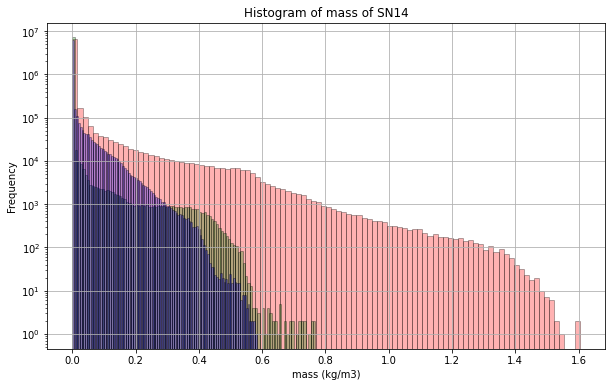

In [11]:
# 欠損値を含む要素をマスク
valid_mask = (dens_s != fill_value) & (qr_s != fill_value) & (qc_s != fill_value) & (qg_s != fill_value) & (qs_s != fill_value) & (qi_s != fill_value)

# 欠損値を除去して1次元化
dens_s_clean = dens_s[valid_mask].flatten()
qr_s_clean = qr_s[valid_mask].flatten()
qc_s_clean = qc_s[valid_mask].flatten()
qg_s_clean = qg_s[valid_mask].flatten()
qs_s_clean = qs_s[valid_mask].flatten()
qi_s_clean = qi_s[valid_mask].flatten()

# DENS * QR の計算
CR_s = dens_s_clean * qr_s_clean * 1000.0
CC_s = dens_s_clean * qc_s_clean * 1000.0
CG_s = dens_s_clean * qg_s_clean * 1000.0
CS_s = dens_s_clean * qs_s_clean * 1000.0
CI_s = dens_s_clean * qi_s_clean * 1000.0
CL_s = dens_s_clean * (qr_s_clean + qc_s_clean) * 1000.0
CI_s = dens_s_clean * (qi_s_clean + qs_s_clean) * 1000.0

# 最大値・最小値の表示
print(f"CL の最大値: {np.max(CL_s)}")
print(f"CL の最小値: {np.min(CL_s)}")
print('----')
print(f"CG の最大値: {np.max(CG_s)}")
print(f"CG の最小値: {np.min(CG_s)}")
print('----')
print(f"CI の最大値: {np.max(CI_s)}")
print(f"CI の最小値: {np.min(CI_s)}")

# ヒストグラムの描画
plt.figure(figsize=(10, 6))
plt.hist(CL_s, bins=100, color='red', edgecolor='black', alpha =0.3)
plt.hist(CG_s, bins=100, color='green', edgecolor='black', alpha =0.3)
plt.hist(CI_s, bins=100, color='blue', edgecolor='black', alpha =0.3)
plt.yscale('log')
plt.title('Histogram of mass of SN14')
plt.xlabel('mass (kg/m3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
from netCDF4 import Dataset
import numpy as np

# 正規化用の配列を用意
cl_t_normalized = np.full_like(dens_t, fill_value, dtype=float)  # 初期値はfill_value
cg_t_normalized = np.full_like(dens_t, fill_value, dtype=float)
ci_t_normalized = np.full_like(dens_t, fill_value, dtype=float)

# 正規化（最大値で割る）
cl_t_normalized[valid_mask] = (dens_t[valid_mask] * (qr_t[valid_mask]+qc_t[valid_mask]) * 1000.0 ) / (np.max(CL_s))
cg_t_normalized[valid_mask] = (dens_t[valid_mask] * (qg_t[valid_mask]) * 1000.0 ) / (np.max(CG_s))
ci_t_normalized[valid_mask] = (dens_t[valid_mask] * (qs_t[valid_mask]+qi_t[valid_mask]) * 1000.0 ) / (np.max(CI_s))

# 確認
print(f"CL_t正規化後の最大値（除外込み）: {np.max(cl_t_normalized[cl_t_normalized != fill_value])}")
print(f"CL_t正規化後の最大値（除外込み）: {np.max(cg_t_normalized[cg_t_normalized != fill_value])}")
print(f"CL_t正規化後の最大値（除外込み）: {np.max(ci_t_normalized[ci_t_normalized != fill_value])}")

rgb_t = np.stack([cl_t_normalized,cg_t_normalized,ci_t_normalized], axis=-1)

print(cl_t_normalized.shape)

CL_t正規化後の最大値（除外込み）: 0.9236046671867371
CL_t正規化後の最大値（除外込み）: 1.1634776592254639
CL_t正規化後の最大値（除外込み）: 0.3353675603866577
(25, 36, 90, 90)


In [21]:
from netCDF4 import Dataset
import numpy as np

# 正規化用の配列を用意
cl_s_normalized = np.full_like(dens_s, fill_value, dtype=float)  # 初期値はfill_value
cg_s_normalized = np.full_like(dens_s, fill_value, dtype=float)
ci_s_normalized = np.full_like(dens_s, fill_value, dtype=float)

# 正規化（最大値で割る）
cl_s_normalized[valid_mask] = (dens_s[valid_mask] * (qr_s[valid_mask]+qc_s[valid_mask]) * 1000.0 ) / (np.max(CL_s))
cg_s_normalized[valid_mask] = (dens_s[valid_mask] * (qg_s[valid_mask]) * 1000.0 ) / (np.max(CG_s))
ci_s_normalized[valid_mask] = (dens_s[valid_mask] * (qs_s[valid_mask]+qi_s[valid_mask]) * 1000.0 ) / (np.max(CI_s))

# 確認
print(f"CL_s正規化後の最大値（除外込み）: {np.max(cl_s_normalized[cl_s_normalized != fill_value])}")
print(f"CL_s正規化後の最大値（除外込み）: {np.max(cg_s_normalized[cg_s_normalized != fill_value])}")
print(f"CL_s正規化後の最大値（除外込み）: {np.max(ci_s_normalized[ci_s_normalized != fill_value])}")

rgb_s = np.stack([cl_s_normalized,cg_s_normalized,ci_s_normalized], axis=-1)

print(cl_s_normalized.shape)

CL_s正規化後の最大値（除外込み）: 1.0
CL_s正規化後の最大値（除外込み）: 1.0
CL_s正規化後の最大値（除外込み）: 1.0
(25, 36, 90, 90)


In [63]:
# 経度138度に最も近いxインデックスを決定（緯度方向 y の中央のラインで抽出）
target_lon = 139.0
mid_y = lat.shape[0] // 2
abs_diff = np.abs(lon[mid_y, :] - target_lon)
x_idx = abs_diff.argmin()
print(f"最も近い経度: {lon[mid_y, x_idx]:.2f}°, xインデックス: {x_idx}")

最も近い経度: 139.06°, xインデックス: 62


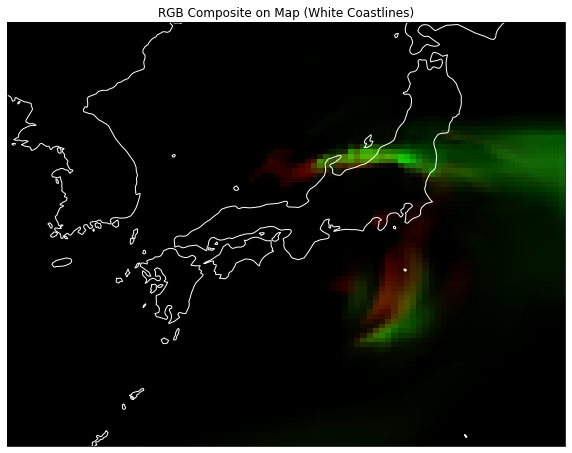

In [72]:
# 描画パラメータ
t_val = 20
z_val = 16

# 地図上に描画
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# RGB画像表示（緯度経度をextentに指定）
ax.imshow(rgb_t[t_val,z_val,:,:,:], origin='lower',
          extent=[lon.min(), lon.max(), lat.min(), lat.max()],
          transform=ccrs.PlateCarree())

# 海岸線を白で描画
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='white')

# その他地図要素（任意）
# ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='white')
# ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.2)

ax.set_title("RGB Composite on Map (White Coastlines)")
plt.show()

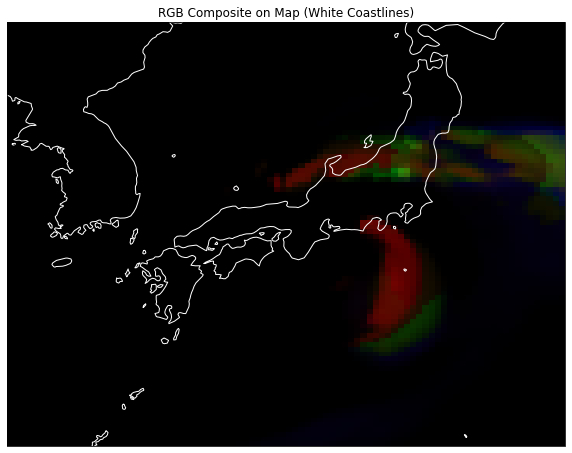

In [73]:
# 地図上に描画
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# RGB画像表示（緯度経度をextentに指定）
ax.imshow(rgb_s[t_val,z_val,:,:,:], origin='lower',
          extent=[lon.min(), lon.max(), lat.min(), lat.max()],
          transform=ccrs.PlateCarree())

# 海岸線を白で描画
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='white')

# その他地図要素（任意）
# ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='white')
# ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.2)

ax.set_title("RGB Composite on Map (White Coastlines)")
plt.show()

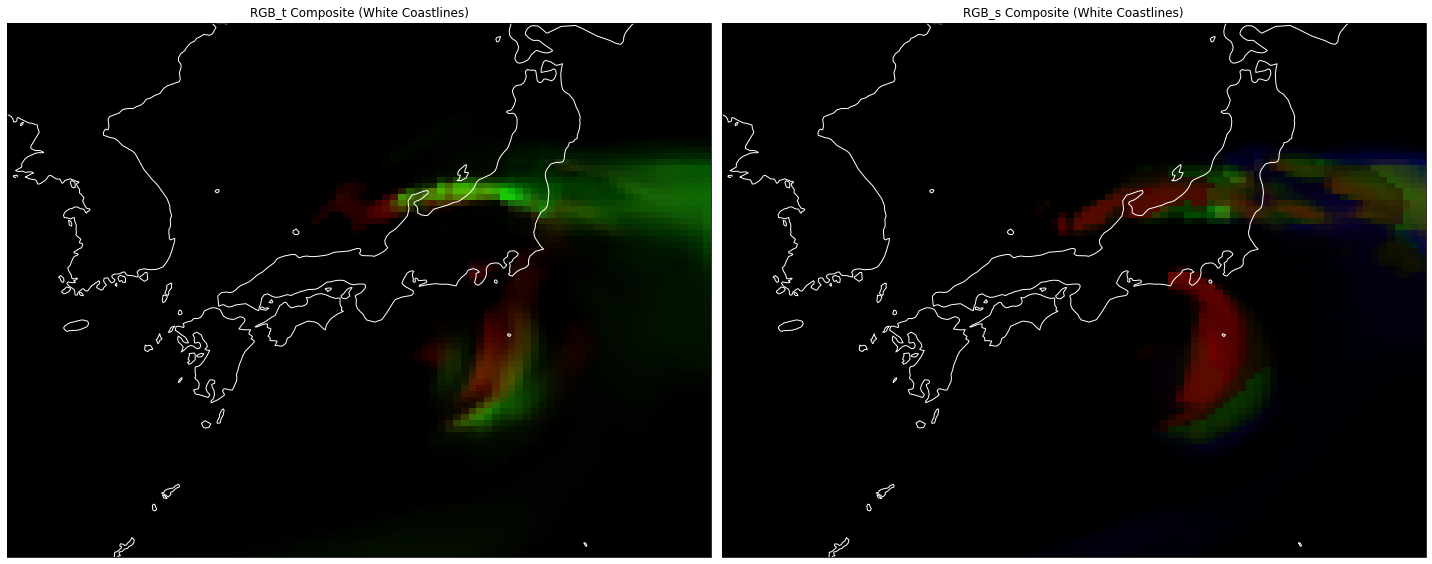

In [79]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 描画パラメータ
t_val = 20
z_val = 16

# 2つの地図サブプロットを作成（横並び）
fig, axs = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# ---------- 左側：rgb_t ----------
axs[0].imshow(
    rgb_t[t_val, z_val, :, :, :],
    origin='lower',
    extent=[lon.min(), lon.max(), lat.min(), lat.max()],
    transform=ccrs.PlateCarree()
)
axs[0].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='white')
axs[0].set_title("RGB_t Composite (White Coastlines)")

# ---------- 右側：rgb_s ----------
axs[1].imshow(
    rgb_s[t_val, z_val, :, :, :],
    origin='lower',
    extent=[lon.min(), lon.max(), lat.min(), lat.max()],
    transform=ccrs.PlateCarree()
)
axs[1].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='white')
axs[1].set_title("RGB_s Composite (White Coastlines)")

# レイアウト調整
plt.tight_layout()
plt.show()


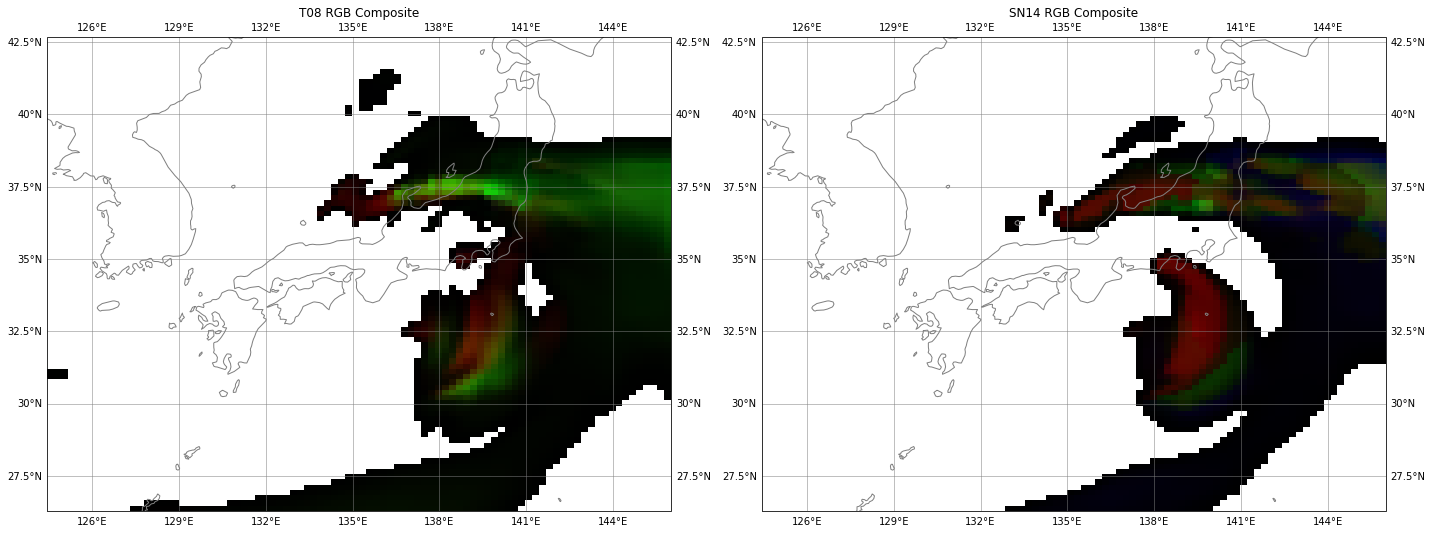

In [83]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 描画パラメータ
t_val = 20
z_val = 16

# RGB画像をコピーして処理（合計値が小さいピクセルを白に）
def apply_rgb_mask(rgb_array):
    rgb = rgb_array.copy()
    mask = rgb.sum(axis=2) < (1/256)
    rgb[mask] = [1.0, 1.0, 1.0]  # 白
    return rgb

# マスク適用
rgb_t_masked = apply_rgb_mask(rgb_t[t_val, z_val, :, :, :])
rgb_s_masked = apply_rgb_mask(rgb_s[t_val, z_val, :, :, :])

# 地図サブプロット（横に2枚）
fig, axs = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# ---------- 左：rgb_t ----------
axs[0].imshow(
    rgb_t_masked, origin='lower',
    extent=[lon.min(), lon.max(), lat.min(), lat.max()],
    transform=ccrs.PlateCarree()
)
axs[0].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray')
axs[0].gridlines(draw_labels=True, color='gray', linewidth=0.5)
axs[0].set_title("T08 RGB Composite")

# ---------- 右：rgb_s ----------
axs[1].imshow(
    rgb_s_masked, origin='lower',
    extent=[lon.min(), lon.max(), lat.min(), lat.max()],
    transform=ccrs.PlateCarree()
)
axs[1].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray')
axs[1].gridlines(draw_labels=True, color='gray', linewidth=0.5)
axs[1].set_title("SN14 RGB Composite")

# レイアウト調整
plt.tight_layout()
plt.show()


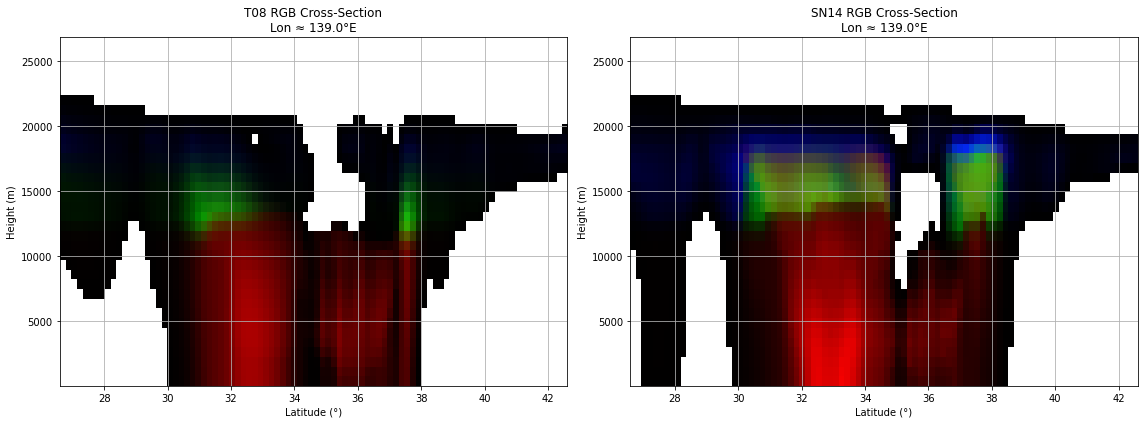

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# コピーして加工（元配列を壊さないように）
rgb_t_display = rgb_t[t_val, :, :, x_idx].copy()
rgb_s_display = rgb_s[t_val, :, :, x_idx].copy()

# 合計が1/256未満のマスクを作成
mask_t = rgb_t_display.sum(axis=2) < (1 / 256)
mask_s = rgb_s_display.sum(axis=2) < (1 / 256)

# 該当ピクセルを白に（[1, 1, 1]）
rgb_t_display[mask_t] = [1.0, 1.0, 1.0]
rgb_s_display[mask_s] = [1.0, 1.0, 1.0]

# 描画
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# ---------- 1枚目：rgb_t ----------
axs[0].imshow(
    rgb_t_display,
    origin='lower',
    aspect='auto',
    extent=[lat[:, x_idx].min(), lat[:, x_idx].max(), z.min(), z.max()]
)
axs[0].set_xlabel('Latitude (°)')
axs[0].set_ylabel('Height (m)')
axs[0].set_title(f'T08 RGB Cross-Section\nLon ≈ {target_lon:.1f}°E')
axs[0].grid(True)

# ---------- 2枚目：rgb_s ----------
axs[1].imshow(
    rgb_s_display,
    origin='lower',
    aspect='auto',
    extent=[lat[:, x_idx].min(), lat[:, x_idx].max(), z.min(), z.max()]
)
axs[1].set_xlabel('Latitude (°)')
axs[1].set_ylabel('Height (m)')
axs[1].set_title(f'SN14 RGB Cross-Section\nLon ≈ {target_lon:.1f}°E')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [27]:
#initialized position data
vertical_range = np.linspace(-60, 40, 101)
hex_data_rgb_t = np.zeros((dens_t.shape[0],r.shape[0], r.shape[1], vertical_range.shape[0]))
pos_data_rgb_t = np.full_like(dens_t, fill_value, dtype=float)


start_time = time.time()

for it in range(dens_t.shape[0]):
    print('time step:',it+1)
    for kz in range(dens_t.shape[1]):
        for jy in range(dens_t.shape[2]):
            for ix in range(dens_t.shape[3]):
                tmp_data_rgb_t = np.zeros((r.shape[0], r.shape[1]))
                tmp_data_r_t   = np.zeros((r.shape[0], r.shape[1]))+cl_t_normalized[it, kz ,jy, ix]
                tmp_data_g_t   = np.zeros((r.shape[0], r.shape[1]))+cg_t_normalized[it, kz ,jy, ix]
                tmp_data_b_t   = np.zeros((r.shape[0], r.shape[1]))+ci_t_normalized[it, kz ,jy, ix]
                # Calculate the value of the difference in each coordinate of the RGB hexagram
                tmp_data_rgb_t = (r-tmp_data_r_t)**2.0 + (g-tmp_data_g_t)**2.0 + (b-tmp_data_b_t)**2.0
                # Get the index (coordinates) of the minimum value
                if(cl_t_normalized[it, kz ,jy, ix] >= 1/256.0  or cg_t_normalized[it, kz ,jy, ix] >= 1/256.0 or ci_t_normalized[it, kz ,jy, ix] >= 1/256.0):
                    min_index_t = np.unravel_index(np.argmin(tmp_data_rgb_t), tmp_data_rgb_t.shape)
                    v_index_t = np.argmin(np.abs(vertical_range - (t_t[it,kz,jy,ix]-273.15)))
                    
                    # Add 1 to the corresponding coordinates (in this case, the number of persons, but any variable can be used)
                    hex_data_rgb_t[it,min_index_t[0],min_index_t[1],v_index_t] += 1
                    
                    n_tmp = n_df.iloc[min_index_t[0], min_index_t[1]]
                    if n_tmp > 0:
                        pos_data_rgb_t[it,kz,jy,ix] = n_tmp*256.0
                    #    print(n_tmp*256.0)
                

end_time = time.time()

elapsed_time = end_time - start_time
print(f"elapsed time: {elapsed_time:.2f} sec, data size:",dens_t.shape[0]*dens_t.shape[1]*dens_t.shape[2]*dens_t.shape[3],", RGB hexagram size parameter:",k)

print(hex_data_rgb_t.shape)
print(pos_data_rgb_t.shape)

time step: 1
time step: 2
time step: 3
time step: 4
time step: 5
time step: 6
time step: 7
time step: 8
time step: 9
time step: 10
time step: 11
time step: 12
time step: 13
time step: 14
time step: 15
time step: 16
time step: 17
time step: 18
time step: 19
time step: 20
time step: 21
time step: 22
time step: 23
time step: 24
time step: 25
elapsed time: 693.08 sec, data size: 7290000 , RGB hexagram size parameter: 11
(25, 96, 96, 101)
(25, 36, 90, 90)


In [40]:
#initialized position data
vertical_range = np.linspace(-60, 40, 101)
hex_data_rgb_s = np.zeros((dens_s.shape[0],r.shape[0], r.shape[1], vertical_range.shape[0]))
pos_data_rgb_s = np.full_like(dens_s, fill_value, dtype=float)


start_time = time.time()

for it in range(dens_s.shape[0]):
    print('time step:',it+1)
    for kz in range(dens_s.shape[1]):
        for jy in range(dens_s.shape[2]):
            for ix in range(dens_s.shape[3]):
                tmp_data_rgb_s = np.zeros((r.shape[0], r.shape[1]))
                tmp_data_r_s   = np.zeros((r.shape[0], r.shape[1]))+cl_s_normalized[it, kz ,jy, ix]
                tmp_data_g_s   = np.zeros((r.shape[0], r.shape[1]))+cg_s_normalized[it, kz ,jy, ix]
                tmp_data_b_s   = np.zeros((r.shape[0], r.shape[1]))+ci_s_normalized[it, kz ,jy, ix]
                # Calculate the value of the difference in each coordinate of the RGB hexagram
                tmp_data_rgb_s = (r-tmp_data_r_s)**2.0 + (g-tmp_data_g_s)**2.0 + (b-tmp_data_b_s)**2.0
                # Get the index (coordinates) of the minimum value
                if(cl_s_normalized[it, kz ,jy, ix] >= 1/256.0  or cg_s_normalized[it, kz ,jy, ix] >= 1/256.0 or ci_s_normalized[it, kz ,jy, ix] >= 1/256.0):
                    min_index_s = np.unravel_index(np.argmin(tmp_data_rgb_s), tmp_data_rgb_s.shape)
                    v_index_s = np.argmin(np.abs(vertical_range - (t_s[it,kz,jy,ix]-273.15)))
                    
                    # Add 1 to the corresponding coordinates (in this case, the number of persons, but any variable can be used)
                    hex_data_rgb_s[it,min_index_s[0],min_index_s[1],v_index_s] += 1
                    
                    n_tmp = n_df.iloc[min_index_s[0], min_index_s[1]]
                    if n_tmp > 0:
                        pos_data_rgb_s[it,kz,jy,ix] = n_tmp*256.0
                    #    print(n_tmp*256.0)
                

end_time = time.time()

elapsed_time = end_time - start_time
print(f"elapsed time: {elapsed_time:.2f} sec, data size:",dens_s.shape[0]*dens_s.shape[1]*dens_s.shape[2]*dens_s.shape[3],", RGB hexagram size parameter:",k)

print(hex_data_rgb_s.shape)
print(pos_data_rgb_s.shape)

time step: 1
time step: 2
time step: 3
time step: 4
time step: 5
time step: 6
time step: 7
time step: 8
time step: 9
time step: 10
time step: 11
time step: 12
time step: 13
time step: 14
time step: 15
time step: 16
time step: 17
time step: 18
time step: 19
time step: 20
time step: 21
time step: 22
time step: 23
time step: 24
time step: 25
elapsed time: 1104.95 sec, data size: 7290000 , RGB hexagram size parameter: 11
(25, 96, 96, 101)
(25, 36, 90, 90)


(96, 96)
113606.0
(96, 96)
141416.0


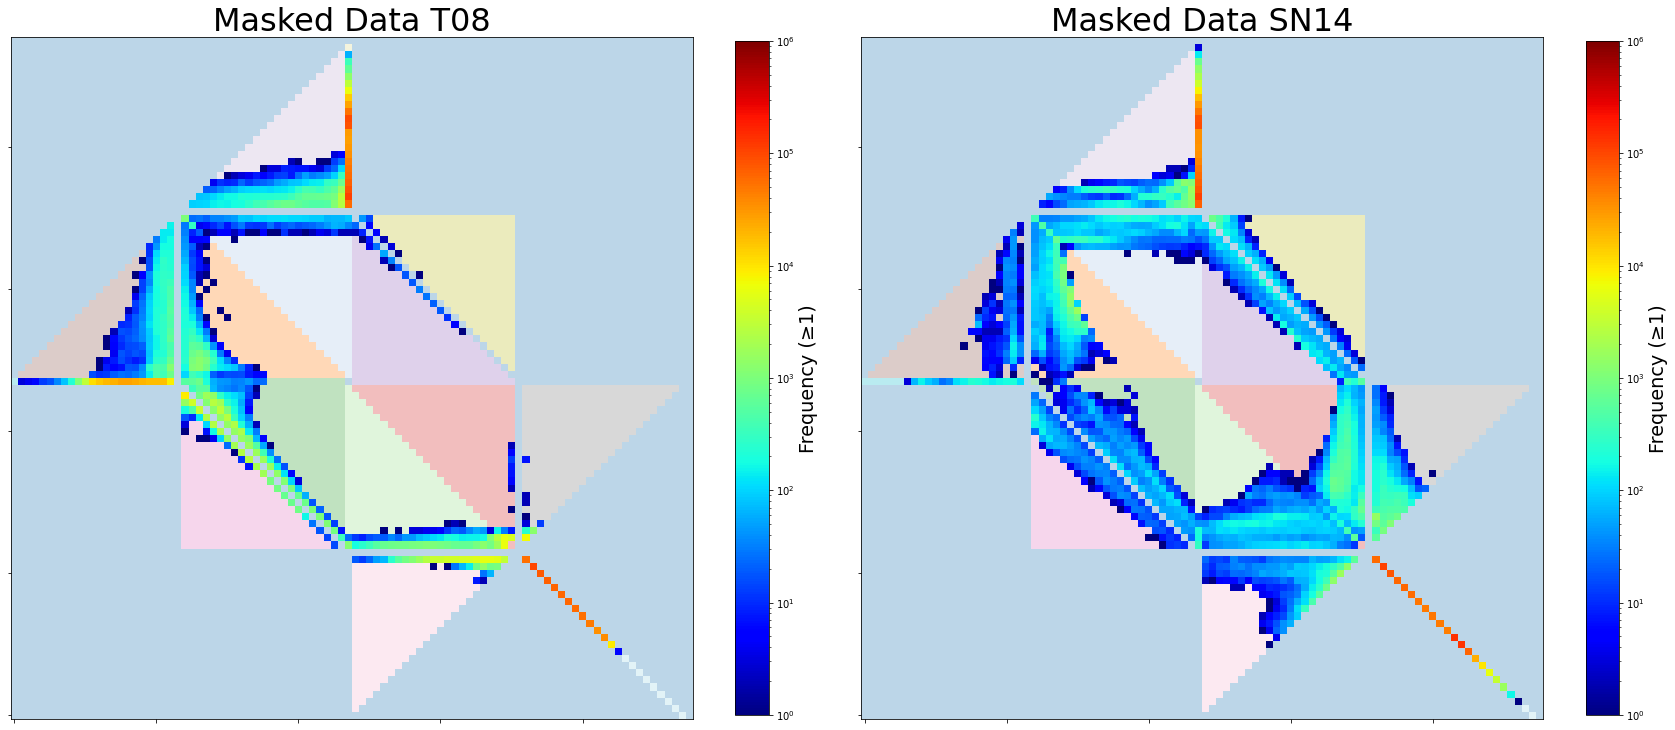

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 時間軸 (axis=0) と高さ軸 (axis=1) に沿って合計 → shape: (90, 90)
sum_xy_t = np.sum(hex_data_rgb_t, axis=(0, 3))
print(sum_xy_t.shape)
print(np.max(sum_xy_t))

sum_xy_s = np.sum(hex_data_rgb_s, axis=(0, 3))
print(sum_xy_s.shape)
print(np.max(sum_xy_s))

# 値が1未満の部分をマスクして可視化対象外にする
masked_data_t = np.ma.masked_less(sum_xy_t, 1)
masked_data_s = np.ma.masked_less(sum_xy_s, 1)

# 描画設定（1行2列にする）
fig, axs = plt.subplots(1, 2, figsize=(24, 12))  # 横に並べるために幅を2倍に
fsiz = 32

# masked_data_a の描画
im_bg_t = axs[0].imshow(n_df, cmap='tab20', origin='lower', alpha=0.3)
im_t = axs[0].imshow(masked_data_t, cmap='jet', origin='lower', norm=LogNorm(vmin=1, vmax=1e+6))
cbar_t = plt.colorbar(im_t, ax=axs[0], shrink=0.8)
cbar_t.set_label('Frequency (≥1)', fontsize=fsiz * 0.6)
axs[0].set_title('Masked Data T08', fontsize=fsiz)
axs[0].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

# masked_data_b の描画
im_bg_s = axs[1].imshow(n_df, cmap='tab20', origin='lower', alpha=0.3)
im_s = axs[1].imshow(masked_data_s, cmap='jet', origin='lower', norm=LogNorm(vmin=1, vmax=1e+6))
cbar_s = plt.colorbar(im_s, ax=axs[1], shrink=0.8)
cbar_s.set_label('Frequency (≥1)', fontsize=fsiz * 0.6)
axs[1].set_title('Masked Data SN14', fontsize=fsiz)
axs[1].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)

plt.tight_layout()
plt.show()


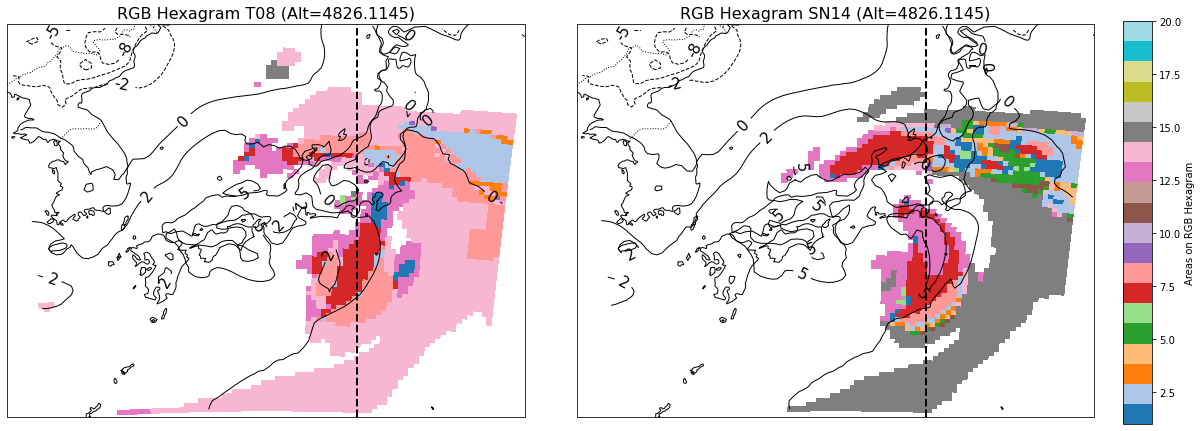

In [71]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 描画パラメータ
t_val = 20
z_val = 16

# Figureと2つの地図軸を作成（横並び）
fig, axs = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# ---------- 1枚目：pos_data_rgb_t ----------
cf_t = axs[0].pcolormesh(
    lon, lat,
    np.ma.masked_less(pos_data_rgb_t[t_val, z_val, :, :], 0.5),
    vmin=1, vmax=20, cmap='tab20', shading='auto'
)
contours_t = axs[0].contour(
    lon, lat,
    t_t[t_val, z_val, :, :] - 273.15,
    colors='black', linewidths=1, transform=ccrs.PlateCarree()
)
axs[0].clabel(contours_t, inline=True, fontsize=15, fmt='%1.0f')
axs[0].coastlines()
axs[0].add_feature(cfeature.BORDERS, linestyle=':')
axs[0].set_title(f"RGB Hexagram T08 (Alt={z[z_val]})", fontsize=16)

# ---------- 2枚目：pos_data_rgb_s ----------
cf_s = axs[1].pcolormesh(
    lon, lat,
    np.ma.masked_less(pos_data_rgb_s[t_val, z_val, :, :], 0.5),
    vmin=1, vmax=20, cmap='tab20', shading='auto'
)
contours_s = axs[1].contour(
    lon, lat,
    t_s[t_val, z_val, :, :] - 273.15,
    colors='black', linewidths=1, transform=ccrs.PlateCarree()
)
axs[1].clabel(contours_s, inline=True, fontsize=15, fmt='%1.0f')
axs[1].coastlines()
axs[1].add_feature(cfeature.BORDERS, linestyle=':')
axs[1].set_title(f"RGB Hexagram SN14 (Alt={z[z_val]})", fontsize=16)

# サブプロット間と余白を調整（右に余白確保）
fig.subplots_adjust(right=0.88, wspace=0.1)

# カラーバー（右側に表示）
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(cf_s, cax=cbar_ax)
cbar.set_label('Areas on RGB Hexagram')

for ax in axs:
    ax.plot(
        [139, 139],                         # 経度（垂直線なので同じ）
        [lat.min(), lat.max()],             # 緯度の範囲に合わせる
        linestyle='--', color='black', linewidth=2,
        transform=ccrs.PlateCarree()        # 緯度経度座標で描画する指定
    )

plt.show()


/home/makoto56/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


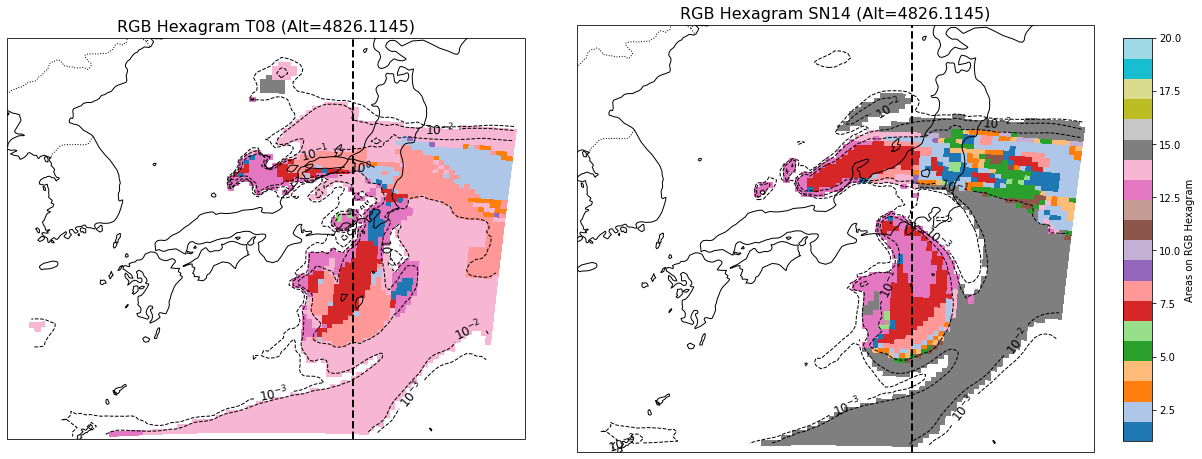

In [91]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 描画パラメータ
t_val = 20
z_val = 16

# Figureと2つの地図軸を作成（横並び）
fig, axs = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# ---------- 1枚目：pos_data_rgb_t ----------
cf_t = axs[0].pcolormesh(
    lon, lat,
    np.ma.masked_less(pos_data_rgb_t[t_val, z_val, :, :], 0.5),
    vmin=1, vmax=20, cmap='tab20', shading='auto'
)

# 対数変換（qhyd_t）
qhyd_t_gkg = qhyd_t[t_val, z_val, :, :] * 1000.0  # g/kgに変換
qhyd_t_log = np.ma.masked_less_equal(qhyd_t_gkg, 0.0)
contours_t = axs[0].contour(
    lon, lat,
    np.log10(qhyd_t_log),
    levels=np.arange(-3, 1, 1),  # 10^-3 ～ 10^0 [g/kg]
    colors='black', linewidths=1, transform=ccrs.PlateCarree()
)
axs[0].clabel(
    contours_t, inline=True, fontsize=12,
    fmt=lambda x: f"$10^{{{int(x)}}}$"
)
axs[0].coastlines()
axs[0].add_feature(cfeature.BORDERS, linestyle=':')
axs[0].set_title(f"RGB Hexagram T08 (Alt={z[z_val]})", fontsize=16)

# ---------- 2枚目：pos_data_rgb_s ----------
cf_s = axs[1].pcolormesh(
    lon, lat,
    np.ma.masked_less(pos_data_rgb_s[t_val, z_val, :, :], 0.5),
    vmin=1, vmax=20, cmap='tab20', shading='auto'
)

# 対数変換（qhyd_s）
qhyd_s_gkg = qhyd_s[t_val, z_val, :, :] * 1000.0
qhyd_s_log = np.ma.masked_less_equal(qhyd_s_gkg, 0.0)
contours_s = axs[1].contour(
    lon, lat,
    np.log10(qhyd_s_log),
    levels=np.arange(-3, 1, 1),
    colors='black', linewidths=1, transform=ccrs.PlateCarree()
)
axs[1].clabel(
    contours_s, inline=True, fontsize=12,
    fmt=lambda x: f"$10^{{{int(x)}}}$"
)
axs[1].coastlines()
axs[1].add_feature(cfeature.BORDERS, linestyle=':')
axs[1].set_title(f"RGB Hexagram SN14 (Alt={z[z_val]})", fontsize=16)

# サブプロット間と余白を調整（右に余白確保）
fig.subplots_adjust(right=0.88, wspace=0.1)

# カラーバー（右側に表示）
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(cf_s, cax=cbar_ax)
cbar.set_label('Areas on RGB Hexagram')

# 経度線を追加
for ax in axs:
    ax.plot(
        [139, 139],                         # 経度（垂直線）
        [lat.min(), lat.max()],             # 緯度の範囲
        linestyle='--', color='black', linewidth=2,
        transform=ccrs.PlateCarree()
    )

plt.show()


/home/makoto56/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/home/makoto56/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


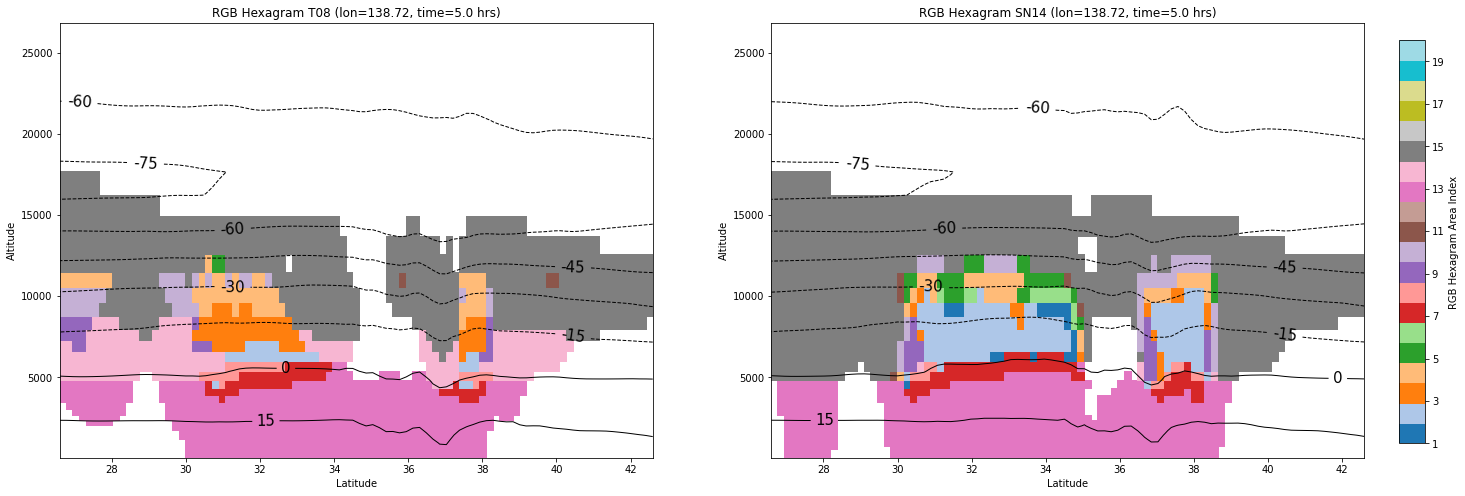

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# 2つのサブプロット（横に並べる）
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# ---------- 1枚目：pos_data_rgb_t ----------
pcm_t = axs[0].pcolormesh(
    lat[:, x_idx], zz,
    np.ma.masked_less(pos_data_rgb_t[t_val, :, :, x_idx], 0.5),
    cmap='tab20', vmin=1, vmax=20
)
contours_t = axs[0].contour(
    lat[:, x_idx], zz,
    t_t[t_val, :, :, x_idx] - 273.15,
    colors='black', linewidths=1
)
axs[0].clabel(contours_t, inline=True, fontsize=15, fmt='%1.0f')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Altitude')
axs[0].set_title(f'RGB Hexagram T08 (lon={lon[0, x_idx]:.2f}, time={time_val[t_val]/3600:.1f} hrs)')

# ---------- 2枚目：pos_data_rgb_s ----------
pcm_b = axs[1].pcolormesh(
    lat[:, x_idx], zz,
    np.ma.masked_less(pos_data_rgb_s[t_val, :, :, x_idx], 0.5),
    cmap='tab20', vmin=1, vmax=20
)
contours_s = axs[1].contour(
    lat[:, x_idx], zz,
    t_s[t_val, :, :, x_idx] - 273.15,
    colors='black', linewidths=1
)
axs[1].clabel(contours_s, inline=True, fontsize=15, fmt='%1.0f')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Altitude')
axs[1].set_title(f'RGB Hexagram SN14 (lon={lon[0, x_idx]:.2f}, time={time_val[t_val]/3600:.1f} hrs)')

# ---------- カラーバー ----------
# サブプロットの余白調整
fig.subplots_adjust(right=0.88, wspace=0.2)

# カラーバー用の軸を追加（[left, bottom, width, height]）
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(pcm_t, cax=cbar_ax)
cbar.set_label('RGB Hexagram Area Index')
cbar.set_ticks(np.arange(1, 21, 2))

plt.show()


/home/makoto56/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/home/makoto56/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/home/makoto56/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/makoto56/.local/lib/python3.6/

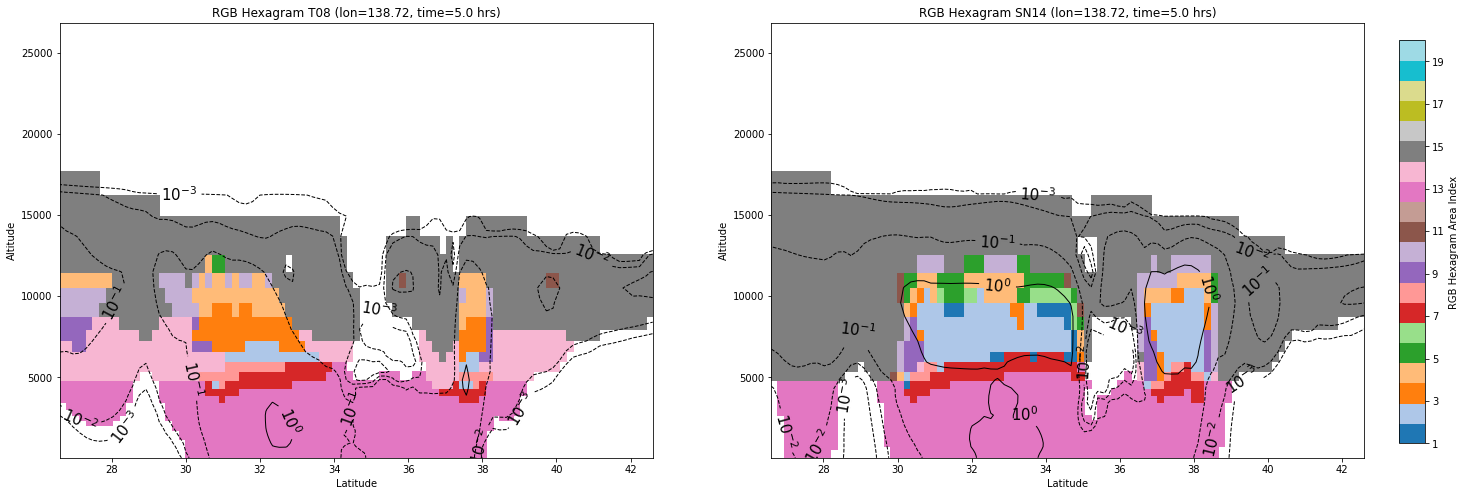

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# 2つのサブプロット（横に並べる）
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# ---------- 1枚目：pos_data_rgb_t ----------
pcm_t = axs[0].pcolormesh(
    lat[:, x_idx], zz,
    np.ma.masked_less(pos_data_rgb_t[t_val, :, :, x_idx], 0.5),
    cmap='tab20', vmin=1, vmax=20
)

# qhyd_t の対数（g/kg）を contour 描画
qhyd_t_gkg = qhyd_t[t_val, :, :, x_idx] * 1000.0
qhyd_t_log = np.ma.masked_less_equal(qhyd_t_gkg, 0.0)
contours_t = axs[0].contour(
    lat[:, x_idx], zz,
    np.log10(qhyd_t_log),
    levels=np.arange(-3, 1, 1),  # 10^-3 ～ 10^0
    colors='black', linewidths=1
)
axs[0].clabel(
    contours_t, inline=True, fontsize=15,
    fmt=lambda x: f"$10^{{{int(x)}}}$"
)
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Altitude')
axs[0].set_title(f'RGB Hexagram T08 (lon={lon[0, x_idx]:.2f}, time={time_val[t_val]/3600:.1f} hrs)')

# ---------- 2枚目：pos_data_rgb_s ----------
pcm_b = axs[1].pcolormesh(
    lat[:, x_idx], zz,
    np.ma.masked_less(pos_data_rgb_s[t_val, :, :, x_idx], 0.5),
    cmap='tab20', vmin=1, vmax=20
)

# qhyd_s の対数（g/kg）を contour 描画
qhyd_s_gkg = qhyd_s[t_val, :, :, x_idx] * 1000.0
qhyd_s_log = np.ma.masked_less_equal(qhyd_s_gkg, 0.0)
contours_s = axs[1].contour(
    lat[:, x_idx], zz,
    np.log10(qhyd_s_log),
    levels=np.arange(-3, 1, 1),
    colors='black', linewidths=1
)
axs[1].clabel(
    contours_s, inline=True, fontsize=15,
    fmt=lambda x: f"$10^{{{int(x)}}}$"
)
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Altitude')
axs[1].set_title(f'RGB Hexagram SN14 (lon={lon[0, x_idx]:.2f}, time={time_val[t_val]/3600:.1f} hrs)')

# ---------- カラーバー ----------
# サブプロットの余白調整
fig.subplots_adjust(right=0.88, wspace=0.2)

# カラーバー用の軸を追加（[left, bottom, width, height]）
cbar_ax = fig.add_axes([0.9, 0.15, 0.015, 0.7])
cbar = fig.colorbar(pcm_t, cax=cbar_ax)
cbar.set_label('RGB Hexagram Area Index')
cbar.set_ticks(np.arange(1, 21, 2))

plt.show()


# Percentage of data in each Area of the RGB hexagram

In [55]:
# sum of pos_data_rgb
total_sum_rgb = np.sum(hex_data_rgb_t)
tz_sum_rgb = np.sum(hex_data_rgb_t, axis=(0,3))

sum_xy_list = []  # Store each sum of n_df = 1 to 15
    
for i in range(1, 16):
    mask = (n_df * 256.0 == i)
    indices = np.where(mask)
    sum_xy = np.sum(tz_sum_rgb[indices])    # Sum of Areas that match each n_df value
    sum_xy_list.append(sum_xy_t)
    print("T08 percentage of Area", i, ": ", f"{100.0 * sum_xy / total_sum_rgb:.3f}", "%")
print(sum_xy)

T08 percentage of Area 1 :  0.109 %
T08 percentage of Area 2 :  0.897 %
T08 percentage of Area 3 :  2.527 %
T08 percentage of Area 4 :  1.437 %
T08 percentage of Area 5 :  0.512 %
T08 percentage of Area 6 :  0.016 %
T08 percentage of Area 7 :  1.395 %
T08 percentage of Area 8 :  1.020 %
T08 percentage of Area 9 :  2.041 %
T08 percentage of Area 10 :  2.907 %
T08 percentage of Area 11 :  0.412 %
T08 percentage of Area 12 :  0.004 %
T08 percentage of Area 13 :  41.735 %
T08 percentage of Area 14 :  10.783 %
T08 percentage of Area 15 :  34.205 %
728355.0


In [54]:
# sum of pos_data_rgb
total_sum_rgb = np.sum(hex_data_rgb_s)
tz_sum_rgb = np.sum(hex_data_rgb_s, axis=(0,3))

sum_xy_list = []  # Store each sum of n_df = 1 to 15
    
for i in range(1, 16):
    mask = (n_df * 256.0 == i)
    indices = np.where(mask)
    sum_xy = np.sum(tz_sum_rgb[indices])    # Sum of Areas that match each n_df value
    sum_xy_list.append(sum_xy)
    print("SN14 percentage of Area", i, ": ", f"{100.0 * sum_xy / total_sum_rgb:.3f}", "%")
print(sum_xy)

SN14 percentage of Area 1 :  0.460 %
SN14 percentage of Area 2 :  1.218 %
SN14 percentage of Area 3 :  0.247 %
SN14 percentage of Area 4 :  0.520 %
SN14 percentage of Area 5 :  1.285 %
SN14 percentage of Area 6 :  0.380 %
SN14 percentage of Area 7 :  0.843 %
SN14 percentage of Area 8 :  0.093 %
SN14 percentage of Area 9 :  0.163 %
SN14 percentage of Area 10 :  0.665 %
SN14 percentage of Area 11 :  0.890 %
SN14 percentage of Area 12 :  0.212 %
SN14 percentage of Area 13 :  43.000 %
SN14 percentage of Area 14 :  0.102 %
SN14 percentage of Area 15 :  49.923 %
1052100.0


(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)


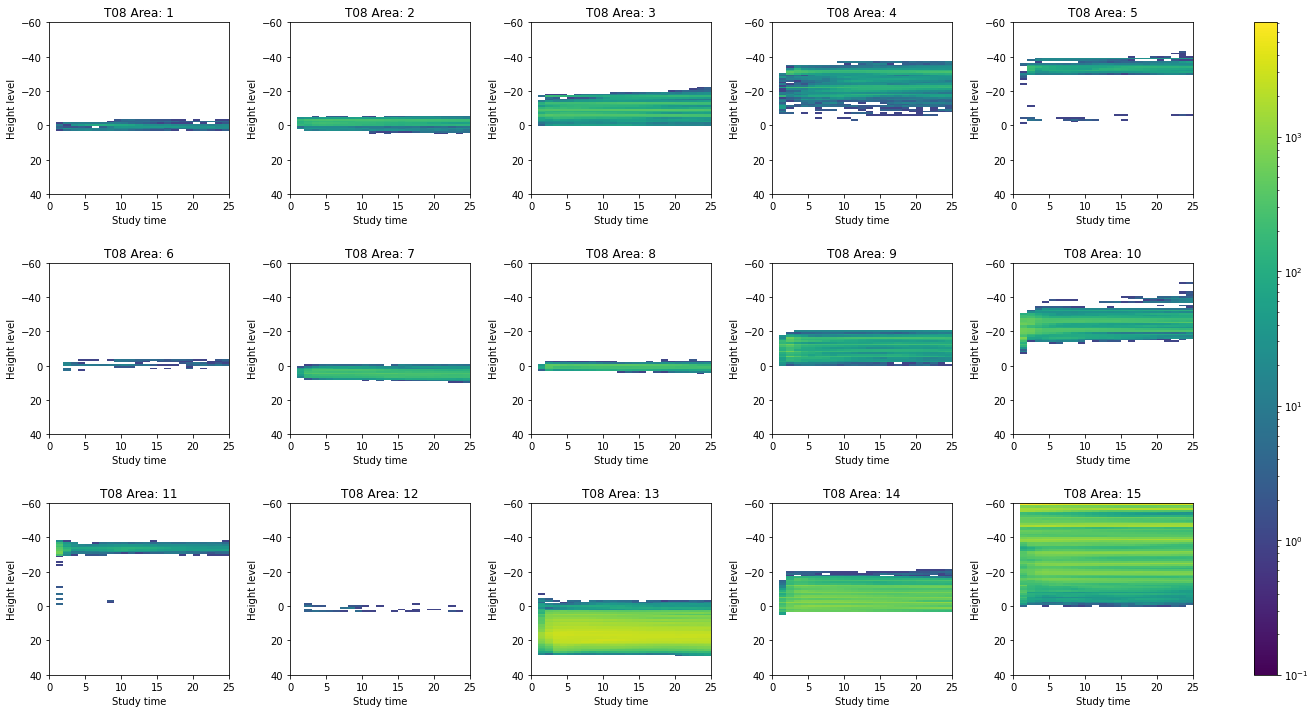

In [57]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# カスタムカラーマップ（0以下を白で表示）
base_cmap = plt.get_cmap('viridis')
cmap = mcolors.ListedColormap(base_cmap(np.linspace(0, 1, 256)))
cmap.set_under('white')  # vmin未満の値に適用

# フィギュア作成
fig = plt.figure(figsize=(22, 12))
gs = gridspec.GridSpec(3, 6, width_ratios=[1,1,1,1,1,1/8], wspace=0.4, hspace=0.4)

axes = []
for i in range(15):
    row = i // 5
    col = i % 5
    ax = fig.add_subplot(gs[row, col])
    axes.append(ax)

# 全領域の最大値を決定（カラースケール統一のため）
global_max = 0
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))  # pandas.DataFrame
    masked_data_list = []
    for iy in range(n_df.shape[0]):
        for ix in range(n_df.shape[1]):
            if target_mask.values[iy, ix]:  # ← 修正済み
                masked_data_list.append(hex_data_rgb_t[:, iy, ix, :])  # shape: (7, 101)
    if masked_data_list:
        masked_data = np.stack(masked_data_list, axis=1)  # shape: (7, N, 101)
        hist_data = np.sum(masked_data, axis=1)           # shape: (7, 101)
        current_max = np.max(hist_data)
        if current_max > global_max:
            global_max = current_max

# 各サブプロットに描画
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))
    masked_data_list = []
    for iy in range(n_df.shape[0]):
        for ix in range(n_df.shape[1]):
            if target_mask.values[iy, ix]:  # ← 修正済み
                masked_data_list.append(hex_data_rgb_t[:, iy, ix, :])
    if masked_data_list:
        masked_data = np.stack(masked_data_list, axis=1)  # shape: (7, N, 101)
        hist_data = np.sum(masked_data, axis=1)           # shape: (7, 101)
    else:
        hist_data = np.zeros((7, 101))  # データがない場合のダミー

    print(hist_data.shape)
    ax = axes[i_area]
    im = ax.imshow(hist_data.T, aspect='auto', origin='upper',
                   extent=[0, 25, 40, -60], cmap=cmap,
                   norm=LogNorm(vmin=0.1, vmax=global_max), interpolation='none')

    ax.set_xlabel('Study time')
    ax.set_ylabel('Height level')
    ax.set_title('T08 Area: ' + str(i_area + 1))
    ax.grid(False)

# カラーバーを右側に追加
cbar_ax = fig.add_subplot(gs[:, 5])
fig.colorbar(im, cax=cbar_ax)

plt.show()


(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)
(25, 101)


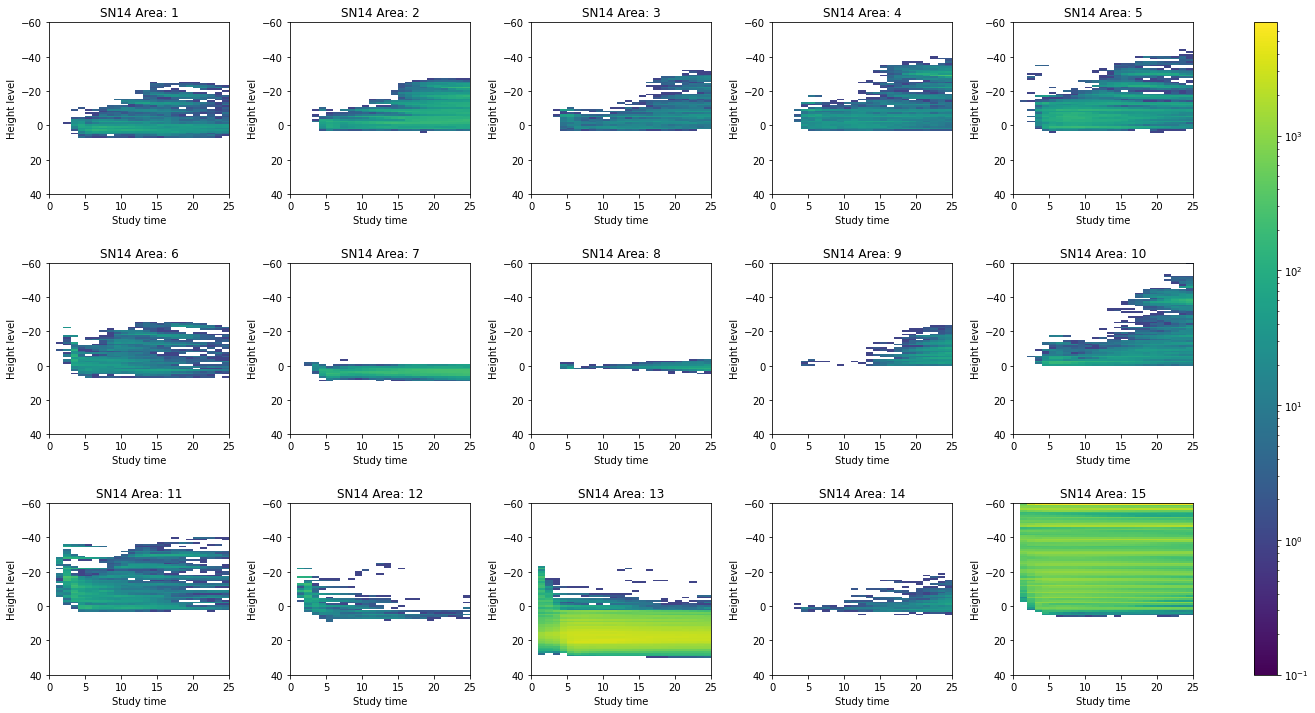

In [58]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm

# カスタムカラーマップ（0以下を白で表示）
base_cmap = plt.get_cmap('viridis')
cmap = mcolors.ListedColormap(base_cmap(np.linspace(0, 1, 256)))
cmap.set_under('white')  # vmin未満の値に適用

# フィギュア作成
fig = plt.figure(figsize=(22, 12))
gs = gridspec.GridSpec(3, 6, width_ratios=[1,1,1,1,1,1/8], wspace=0.4, hspace=0.4)

axes = []
for i in range(15):
    row = i // 5
    col = i % 5
    ax = fig.add_subplot(gs[row, col])
    axes.append(ax)

# 全領域の最大値を決定（カラースケール統一のため）
global_max = 0
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))  # pandas.DataFrame
    masked_data_list = []
    for iy in range(n_df.shape[0]):
        for ix in range(n_df.shape[1]):
            if target_mask.values[iy, ix]:  # ← 修正済み
                masked_data_list.append(hex_data_rgb_s[:, iy, ix, :])  # shape: (7, 101)
    if masked_data_list:
        masked_data = np.stack(masked_data_list, axis=1)  # shape: (7, N, 101)
        hist_data = np.sum(masked_data, axis=1)           # shape: (7, 101)
        current_max = np.max(hist_data)
        if current_max > global_max:
            global_max = current_max

# 各サブプロットに描画
for i_area in range(15):
    target_mask = (n_df * 256.0 == float(i_area + 1))
    masked_data_list = []
    for iy in range(n_df.shape[0]):
        for ix in range(n_df.shape[1]):
            if target_mask.values[iy, ix]:  # ← 修正済み
                masked_data_list.append(hex_data_rgb_s[:, iy, ix, :])
    if masked_data_list:
        masked_data = np.stack(masked_data_list, axis=1)  # shape: (7, N, 101)
        hist_data = np.sum(masked_data, axis=1)           # shape: (7, 101)
    else:
        hist_data = np.zeros((7, 101))  # データがない場合のダミー

    print(hist_data.shape)
    ax = axes[i_area]
    im = ax.imshow(hist_data.T, aspect='auto', origin='upper',
                   extent=[0, 25, 40, -60], cmap=cmap,
                   norm=LogNorm(vmin=0.1, vmax=global_max), interpolation='none')

    ax.set_xlabel('Study time')
    ax.set_ylabel('Height level')
    ax.set_title('SN14 Area: ' + str(i_area + 1))
    ax.grid(False)

# カラーバーを右側に追加
cbar_ax = fig.add_subplot(gs[:, 5])
fig.colorbar(im, cax=cbar_ax)

plt.show()


In [93]:
!pwd

/mnt/meteo-hdd04/makoto/test_polarris-f/simulation_scale/scale-5.5.0/scale-rm/test/tutorial/real/for_python_RGB
